In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Creating mock data for 3 classes, 2-dimensional data

In [8]:
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

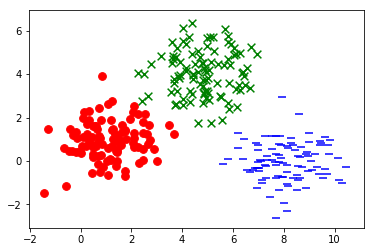

In [9]:
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60) 
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)  
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60) 

In [15]:
xs_label0 = np.hstack((x1_label0, x2_label0))  
xs_label1 = np.hstack((x1_label1, x2_label1))  
xs_label2 = np.hstack((x1_label2, x2_label2))   
xs = np.vstack((xs_label0, xs_label1, xs_label2))
print (xs.shape)

(300, 2)


In [16]:
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

### Shuffling the data points:

In [17]:
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :] 
labels = labels[arr,:]

### Creating test data the same way:

In [18]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
 
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2)) 
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

In [19]:
train_size, num_features = xs.shape

### Hyperparameter setting and other constants:

In [20]:
learning_rate = 0.01
training_epochs = 1000

num_labels = 3
batch_size = 100

### Building softmax regression graph using tf

In [28]:
X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, shape=[None, num_labels])

W = tf.Variable(tf.random_normal([num_features, num_labels])) # one vector for each label
b = tf.Variable(tf.zeros([num_labels])) # one bias for each label

y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y*tf.log(y_model)) # (-YlogY')
train_opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) 

### Creating tf session and Performing batch gradient descent:

In [29]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs*train_size//batch_size):
        offset = (step*batch_size) % train_size
        batch_xs = xs[offset: (offset+batch_size), :]
        batch_labels = labels[offset: (offset+batch_size), :]
        err, _ = sess.run([cost, train_opt], {X:batch_xs, Y:batch_labels})
        print (step, err)
    
    W_val = sess.run(W)
    print ("W: ", W_val)
    b_val = sess.run(b)
    print ("b: ", b_val)
    print ("Accuracy: ", sess.run(accuracy, {X:test_xs, Y:test_labels}))

0 457.737
1 330.671
2 258.798
3 193.43
4 163.97
5 104.129
6 62.727
7 49.009
8 34.1933
9 39.921
10 66.6788
11 108.468
12 183.142
13 125.907
14 68.8167
15 45.8286
16 25.6447
17 20.6595
18 13.5299
19 18.3143
20 15.9317
21 11.2827
22 16.9697
23 13.7198
24 10.2073
25 16.136
26 12.4192
27 9.48388
28 15.3213
29 11.4808
30 8.92811
31 14.5839
32 10.7548
33 8.47861
34 13.9179
35 10.1599
36 8.10267
37 13.3208
38 9.65762
39 7.78156
40 12.7845
41 9.22492
42 7.50296
43 12.3014
44 8.84682
45 7.25829
46 11.8649
47 8.51281
48 7.04131
49 11.4692
50 8.21519
51 6.84728
52 11.1094
53 7.94803
54 6.67253
55 10.7814
56 7.70671
57 6.51417
58 10.4815
59 7.48751
60 6.36985
61 10.2066
62 7.28743
63 6.23765
64 9.95386
65 7.10397
66 6.11602
67 9.72103
68 6.93508
69 6.00365
70 9.50597
71 6.77902
72 5.89942
73 9.30688
74 6.63432
75 5.80242
76 9.12213
77 6.49973
78 5.71185
79 8.95033
80 6.37417
81 5.62702
82 8.79023
83 6.25672
84 5.54736
85 8.64072
86 6.14657
87 5.47235
88 8.50083
89 6.04302
90 5.40154
91 8.36969
92 5

871 4.18754
872 2.31258
873 2.45953
874 4.18358
875 2.30942
876 2.45666
877 4.17964
878 2.30627
879 2.4538
880 4.1757
881 2.30314
882 2.45095
883 4.17179
884 2.30003
885 2.44812
886 4.16788
887 2.29692
888 2.4453
889 4.16399
890 2.29384
891 2.4425
892 4.16012
893 2.29077
894 2.4397
895 4.15625
896 2.28771
897 2.43692
898 4.1524
899 2.28467
900 2.43416
901 4.14856
902 2.28165
903 2.4314
904 4.14474
905 2.27863
906 2.42866
907 4.14093
908 2.27564
909 2.42593
910 4.13713
911 2.27265
912 2.42321
913 4.13335
914 2.26968
915 2.4205
916 4.12957
917 2.26672
918 2.41781
919 4.12581
920 2.26378
921 2.41513
922 4.12206
923 2.26085
924 2.41245
925 4.11833
926 2.25794
927 2.4098
928 4.1146
929 2.25504
930 2.40715
931 4.11089
932 2.25215
933 2.40451
934 4.10719
935 2.24927
936 2.40189
937 4.1035
938 2.24641
939 2.39928
940 4.09983
941 2.24356
942 2.39668
943 4.09617
944 2.24072
945 2.39409
946 4.09251
947 2.2379
948 2.39151
949 4.08887
950 2.23509
951 2.38894
952 4.08525
953 2.23229
954 2.38638
955 

1748 1.75339
1749 1.93753
1750 3.38413
1751 1.75217
1752 1.93635
1753 3.38216
1754 1.75096
1755 1.93518
1756 3.3802
1757 1.74974
1758 1.93401
1759 3.37823
1760 1.74853
1761 1.93284
1762 3.37628
1763 1.74732
1764 1.93167
1765 3.37432
1766 1.74612
1767 1.9305
1768 3.37236
1769 1.74492
1770 1.92934
1771 3.37041
1772 1.74372
1773 1.92818
1774 3.36847
1775 1.74252
1776 1.92702
1777 3.36653
1778 1.74133
1779 1.92587
1780 3.36458
1781 1.74013
1782 1.92472
1783 3.36265
1784 1.73894
1785 1.92356
1786 3.36072
1787 1.73776
1788 1.92241
1789 3.35879
1790 1.73657
1791 1.92127
1792 3.35686
1793 1.73539
1794 1.92012
1795 3.35494
1796 1.73421
1797 1.91898
1798 3.35302
1799 1.73303
1800 1.91784
1801 3.3511
1802 1.73186
1803 1.9167
1804 3.34919
1805 1.73069
1806 1.91557
1807 3.34728
1808 1.72952
1809 1.91444
1810 3.34538
1811 1.72835
1812 1.9133
1813 3.34348
1814 1.72718
1815 1.91217
1816 3.34158
1817 1.72602
1818 1.91105
1819 3.33968
1820 1.72486
1821 1.90992
1822 3.33779
1823 1.7237
1824 1.9088
1825 3

2600 1.48325
2601 1.67179
2602 2.93518
2603 1.4825
2604 1.67103
2605 2.93391
2606 1.48174
2607 1.67027
2608 2.93264
2609 1.48098
2610 1.66952
2611 2.93138
2612 1.48023
2613 1.66876
2614 2.93011
2615 1.47947
2616 1.66801
2617 2.92885
2618 1.47872
2619 1.66725
2620 2.92759
2621 1.47797
2622 1.6665
2623 2.92633
2624 1.47721
2625 1.66575
2626 2.92507
2627 1.47646
2628 1.665
2629 2.92382
2630 1.47571
2631 1.66425
2632 2.92257
2633 1.47497
2634 1.6635
2635 2.92131
2636 1.47422
2637 1.66275
2638 2.92006
2639 1.47347
2640 1.662
2641 2.91882
2642 1.47273
2643 1.66126
2644 2.91757
2645 1.47198
2646 1.66051
2647 2.91632
2648 1.47124
2649 1.65977
2650 2.91508
2651 1.47049
2652 1.65902
2653 2.91384
2654 1.46975
2655 1.65828
2656 2.9126
2657 1.46901
2658 1.65754
2659 2.91136
2660 1.46827
2661 1.65679
2662 2.91013
2663 1.46753
2664 1.65605
2665 2.90889
2666 1.46679
2667 1.65531
2668 2.90766
2669 1.46606
2670 1.65458
2671 2.90643
2672 1.46532
2673 1.65384
2674 2.9052
2675 1.46459
2676 1.6531
2677 2.90